<h1>Data Analytics for Dengue Cases in the Philippines</h1>

<h3>Data Analyst: Bernard Gabito - BSIT 3A</h3>

In [1]:
pip install numpy seaborn pandas matplotlib


[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv("C:\\Users\\User\\Desktop\\ITD3A\\dataset\\dengue.csv")

In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')

In [7]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [8]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>INSIGHT 1</h1>

<h2>Total Dengue Cases by Year</h2>

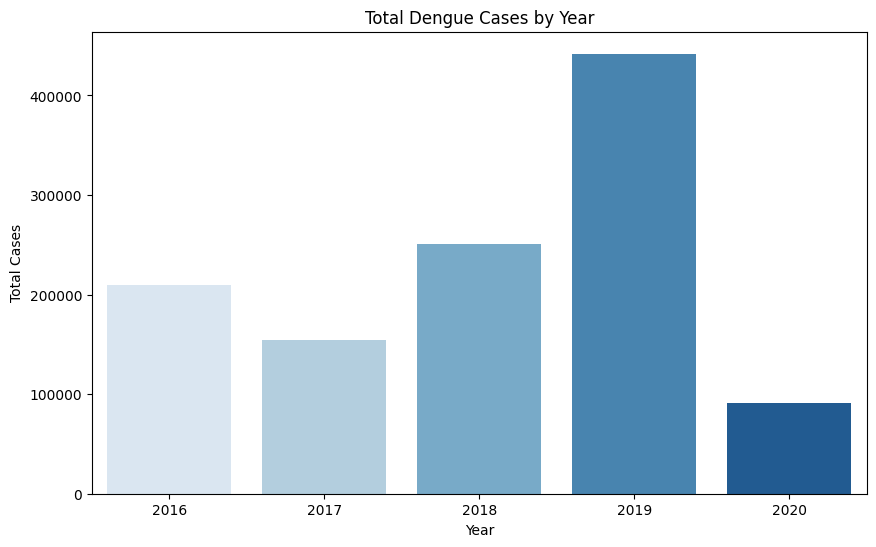

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64


In [9]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_cases.index, y=yearly_cases.values, palette='Blues')
plt.title('Total Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

print(f'{yearly_cases}')

<h3>The data shows a significant fluctuation in Dengue cases, with the highest peak in 2019 (441,902 cases) followed by a sharp decline in 2020 (91,041 cases), likely influenced by external factors such as climate or pandemic-related public health measures. This highlights the importance of understanding these patterns to better predict and manage future outbreaks.</h3>

<h1>INSIGHT 2</h1>
<h2>Year with the Highest Dengue Cases</h2>

In [10]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
highest_year = yearly_cases.idxmax()
highest_cases = yearly_cases.max()
print("The year with the highest dengue cases is:", highest_year)
print("Number of cases:", highest_cases)


The year with the highest dengue cases is: 2019
Number of cases: 441902


<h3>The year 2019 recorded the highest number of Dengue cases at 441,902 , indicating a significant outbreak.</h3>

<h1>INSIGHT 3</h1>

<h2>Monthly Dengue Cases Distribution</h2>

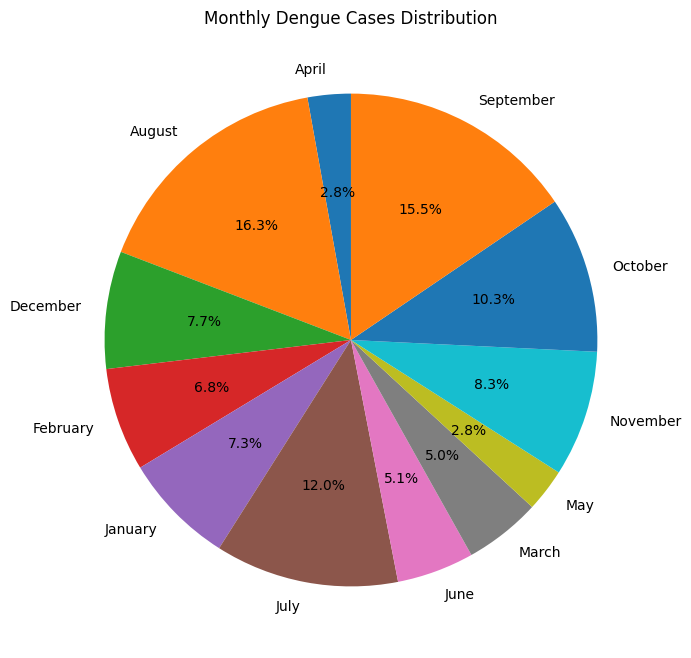

Month
April         32508
August       187554
December      88431
February      77801
January       84328
July         138242
June          58110
March         57576
May           32387
November      94900
October      117645
September    177943
Name: Dengue_Cases, dtype: int64


In [11]:
monthly_cases = dengue.groupby('Month')['Dengue_Cases'].sum().reindex()
plt.figure(figsize=(8, 8))
plt.pie(monthly_cases, labels=monthly_cases.index, autopct='%1.1f%%', startangle=90)
plt.title('Monthly Dengue Cases Distribution')
plt.show()

print(f'{monthly_cases}')

<h3>Dengue cases are highest in August (187,554) and September (177,943), showing a clear peak during the rainy season when mosquitoes thrive. The lowest cases occur in May (32,387), likely due to cooler or drier conditions that reduce mosquito breeding.</h3>

<h1>INSIGHT 4</h1>
<h2> Monthly dengue case distribution on the year of 2017</h2>

In [12]:
m_dengue = dengue[dengue['Year'] == 2017]
monthly_distribution = m_dengue.groupby('Month')['Dengue_Cases'].sum()
monthly_distribution

Month
April         6343
August       25039
December     13235
February      9872
January      15623
July         18340
June          7589
March         7696
May           4853
November     12553
October      15259
September    17753
Name: Dengue_Cases, dtype: int64

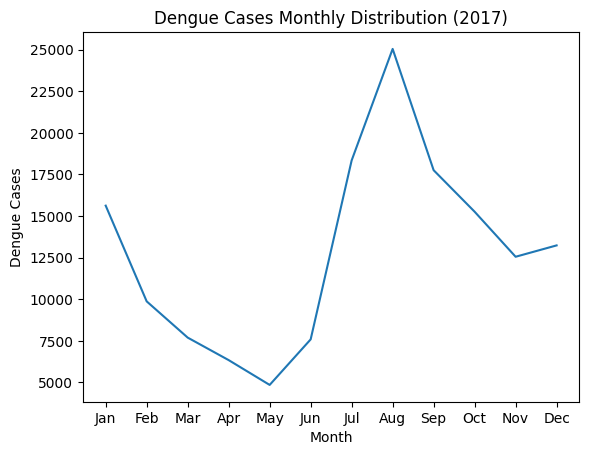

In [13]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']
dengue_cases = [15623, 9872, 7696, 6343, 4853, 7589, 18340, 25039, 
                17753, 15259, 12553, 13235]

plt.plot(months, dengue_cases)
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.title('Dengue Cases Monthly Distribution (2017)')
plt.show()


<h3>In 2017, Dengue cases peaked in **August (25,039)** and were lowest in **May (4,853)**, reflecting a seasonal trend with higher transmission during the rainy season. The sharp increase in mid-year suggests that environmental conditions like rainfall likely contributed to mosquito breeding and disease spread during this period.</h3>

<H1>INSIGHT 5</H1>
<H2>Month with the highest dengue case in 2017</H2>

In [14]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dengue_cases = [15623, 9872, 7696, 6343, 4853, 7589, 18340, 25039, 17753, 15259, 12553, 13235]
max_cases = max(dengue_cases)
max_month = months[dengue_cases.index(max_cases)]
print("The month with the highest dengue cases is:", max_month)
print("Number of cases:", max_cases)

The month with the highest dengue cases is: Aug
Number of cases: 25039


<h3>The month with the highest Dengue cases in 2017 was August , with 25,039 cases , likely due to increased mosquito activity during the rainy season. This highlights the need for heightened prevention efforts and public awareness during peak months to reduce outbreaks.</h3>

<H1>INSIGHT 6</H1>
<h2>Whats the distribution of Dengue Deaths in the year of 2017</h2>



In [15]:
D_dengue = dengue[dengue['Year'] == 2017]
D_deaths = D_dengue.groupby('Month')['Dengue_Deaths'].sum()
D_deaths

Month
April          43
August        111
December       73
February       64
January        95
July           74
June           42
March          36
May            23
November       78
October      2098
September    1826
Name: Dengue_Deaths, dtype: int64

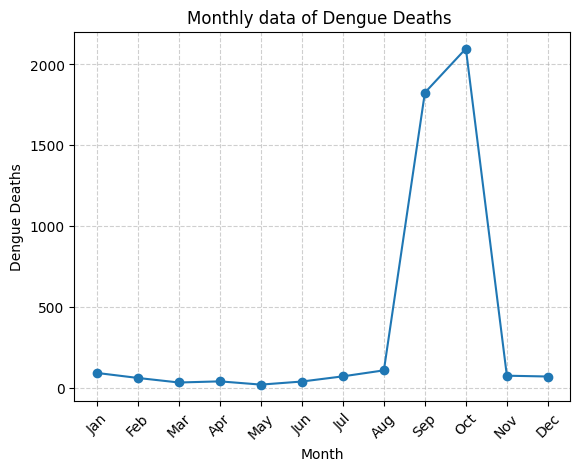

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']
dengue_deaths = [95, 64, 36, 43, 23, 42, 74, 111, 1826, 2098, 78, 73]

plt.plot(months, dengue_deaths, marker='o', linestyle='-',)
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.title('Monthly data of Dengue Deaths ')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


<h1>INSIGHT 7</h1>

<h2>Dengue Cases per Region</h2>

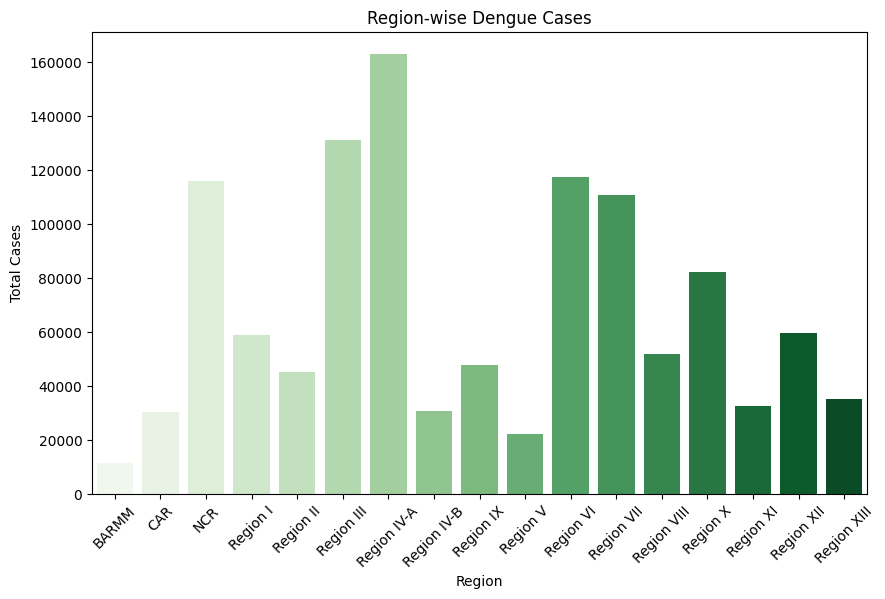

Region
BARMM           11537
CAR             30582
NCR            115966
Region I        59066
Region II       45141
Region III     131064
Region IV-A    163029
Region IV-B     30849
Region IX       47781
Region V        22167
Region VI      117523
Region VII     110683
Region VIII     51983
Region X        82437
Region XI       32522
Region XII      59802
Region XIII     35293
Name: Dengue_Cases, dtype: int64


In [17]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_cases.index, y=region_cases.values, palette='Greens')
plt.title('Region-wise Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

print(f'{region_cases}')

<h3>Region IV-A has the highest number of Dengue cases (163,029), indicating it as a hotspot possibly due to its environment or population density. In contrast, BARMM reports the lowest cases (11,537), suggesting varying regional factors like climate, urbanization, or healthcare access influence the spread of Dengue.</h3>

<h1>INSIGHT 8</h1>
<h2>Dengue rates per year in Region - IV-A</h2>

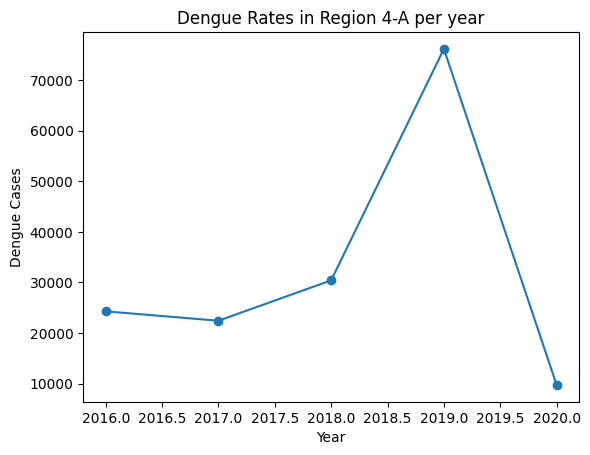

[24282 22421 30410 76195  9721]


In [18]:
region_data = dengue[dengue['Region'] == 'Region IV-A']
annual_dengue_rates = region_data.groupby('Year')['Dengue_Cases'].sum()
annual_dengue_rates
years = annual_dengue_rates.index
dengue_cases = annual_dengue_rates.values

plt.plot(years, dengue_cases, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Dengue Rates in Region 4-A per year')
plt.show()

print(f'{dengue_cases}')

<h3>Region 4-A saw a sharp rise in Dengue cases in 2019, peaking at over 70,000, followed by a steep drop in 2020. This suggests a major outbreak in 2019, possibly due to environmental factors, and a decline in 2020 potentially linked to public health measures or other changes.</h3>

<h1>INSIGHT 9</h1>

<h2>Relationship between Dengue Cases and Deaths</h2>

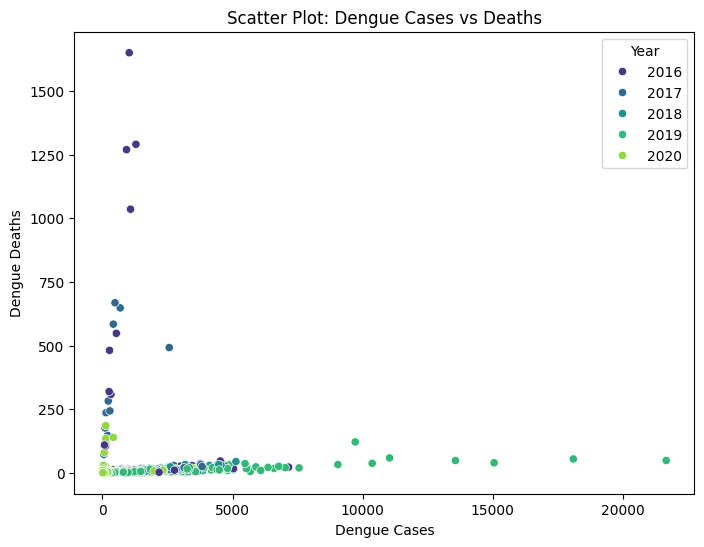

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Year', palette='viridis')
plt.title('Scatter Plot: Dengue Cases vs Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()

<h3>The scatter plot shows a general trend where higher Dengue cases are associated with more deaths, particularly in earlier years like 2016 and 2017. However, the relationship weakens over time, as seen in 2019 and 2020, where even high case numbers result in significantly fewer deaths. This could indicate improved healthcare interventions, better awareness, or changes in the virus strain that reduce mortality rates despite increased infections.</h3>

<h1>INSIGHT 10</h1>

<h2>Distribution of Dengue cases across all months/years.</h2>

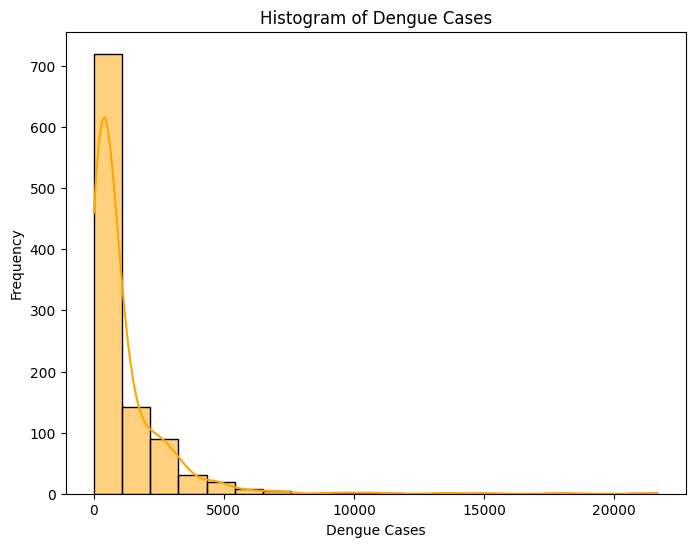

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(dengue['Dengue_Cases'], bins=20, kde=True, color='orange')
plt.title('Histogram of Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.show()

<h3>The histogram shows that the majority of locations or periods have very low Dengue case counts, with a significant peak around 0–1,000 cases. This indicates that most areas experience minimal outbreaks, while only a small number of regions or time periods see higher case numbers. The long tail suggests that extreme outbreaks are rare but can occur, highlighting the importance of targeted interventions to prevent and manage these high-impact scenarios.</h3>

<h1>INSIGHT 11</h1>

<h2>Correlation between Dengue Cases and Deaths</h2>

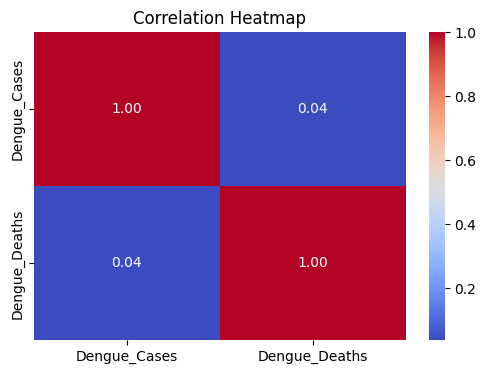

In [21]:
correlation_matrix = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<h3>The correlation heatmap shows a very weak positive correlation (0.04) between Dengue cases and Dengue deaths, indicating that the number of cases does not strongly predict the number of deaths. This suggests that other factors, such as healthcare access, treatment quality, or underlying health conditions, may play a more significant role in determining mortality rates rather than just the total number of infections.</h3>

<h1>INSIGHT 12</h1>

<h2>Yearly Trend in Dengue Deaths</h2>

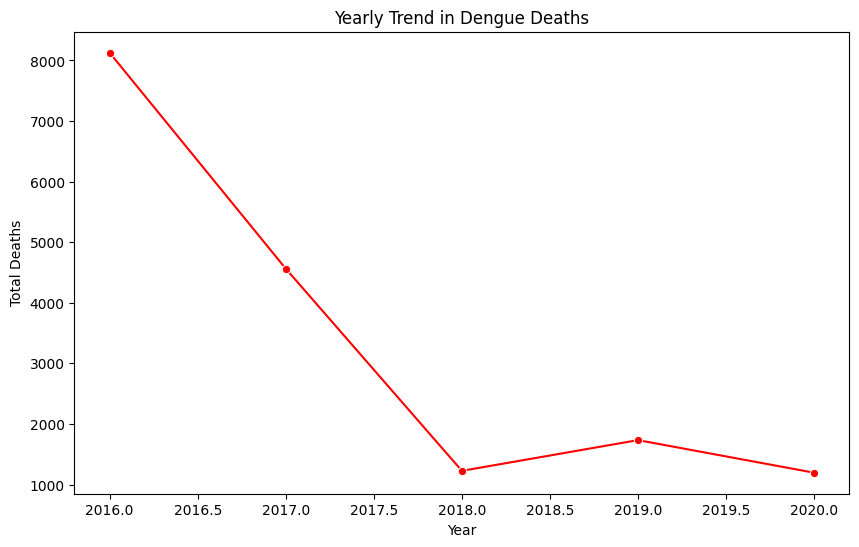

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64


In [22]:
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_deaths.index, y=yearly_deaths.values, marker='o', color='red')
plt.title('Yearly Trend in Dengue Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()

print(f'{yearly_deaths}')

<h3>The number of yearly Dengue-related deaths has generally decreased over the years, with a significant drop from 8,127 in 2016 to 1,195 in 2020. This trend suggests possible improvements in healthcare, disease management, or public health interventions, even as case numbers fluctuated.</h3>

<h1>INSIGHT 13</h1>

<h2>Regional Contribution to Total Deaths</h2>

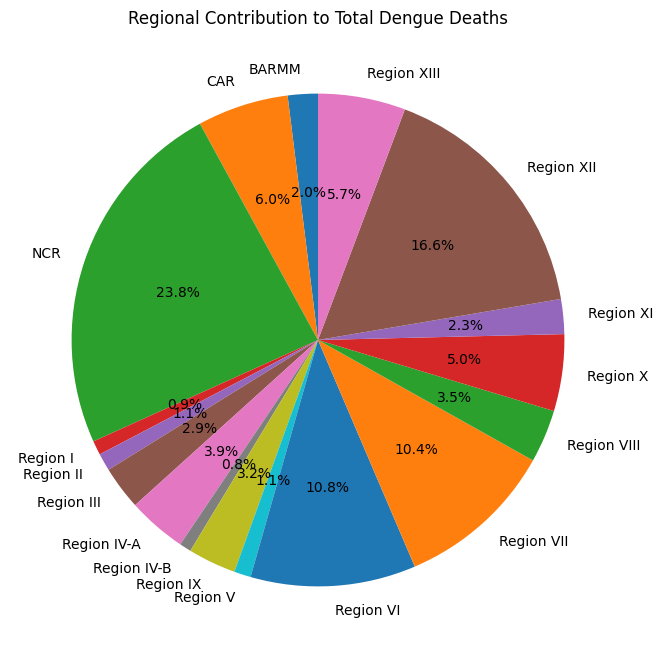

Region
BARMM           332
CAR            1008
NCR            4008
Region I        157
Region II       193
Region III      482
Region IV-A     652
Region IV-B     130
Region IX       532
Region V        185
Region VI      1825
Region VII     1760
Region VIII     585
Region X        848
Region XI       385
Region XII     2796
Region XIII     966
Name: Dengue_Deaths, dtype: int64


In [23]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_deaths, labels=region_deaths.index, autopct='%1.1f%%', startangle=90)
plt.title('Regional Contribution to Total Dengue Deaths')
plt.show()

print(f'{region_deaths}')

<h3>Region XII (2,796 deaths) and NCR (4,008 deaths) contribute the most to total Dengue-related deaths, highlighting these regions as critical areas for targeted healthcare interventions. In contrast, Region I (157 deaths) and Region II (193 deaths) show significantly lower death counts, indicating varying levels of disease severity or differences in healthcare response across regions.</h3>

<h1>INSIGHT 14</h1>

<h2>Monthly Dengue Deaths</h2>

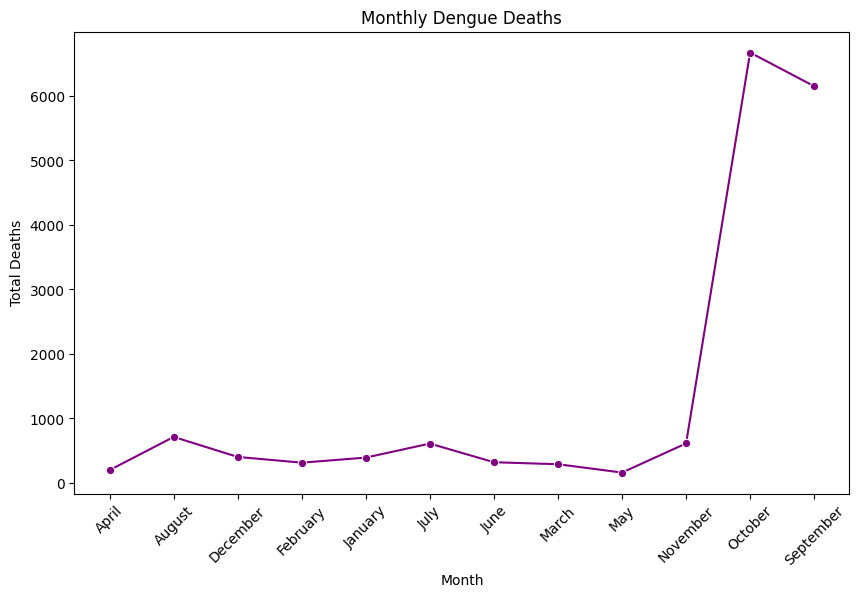

Month
April         200
August        714
December      404
February      315
January       394
July          611
June          322
March         291
May           162
November      613
October      6670
September    6148
Name: Dengue_Deaths, dtype: int64


In [24]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_deaths.index, y=monthly_deaths.values, marker='o', color='purple')
plt.title('Monthly Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

print(f'{monthly_deaths}')

<h1>INSIGHT 15</h1>
<h2>Monthly deaths in Region 4-A</h2>

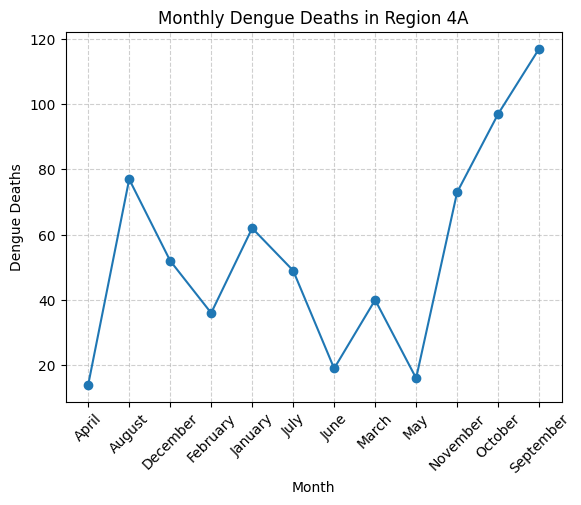

Month
April         14
August        77
December      52
February      36
January       62
July          49
June          19
March         40
May           16
November      73
October       97
September    117
Name: Dengue_Deaths, dtype: int64

In [25]:
region_data = dengue[dengue['Region'] == 'Region IV-A']
monthly_deaths = region_data.groupby('Month')['Dengue_Deaths'].sum()

months = monthly_deaths.index
deaths = monthly_deaths.values
plt.plot(months, deaths, marker='o', linestyle='-',)
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.title('Monthly Dengue Deaths in Region 4A')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()
monthly_deaths

<h3>The data shows a significant spike in Dengue-related deaths in October (6,670) and September (6,148) , coinciding with the peak of the rainy season when mosquito populations are likely higher. Deaths are lowest in May (162) , suggesting that drier or cooler conditions may reduce both infections and fatalities, emphasizing the seasonal nature of Dengue outbreaks.</h3>

<h1>INSIGHT 16</h1>

<h2>Heatmap of Dengue cases by month and year.</h2>

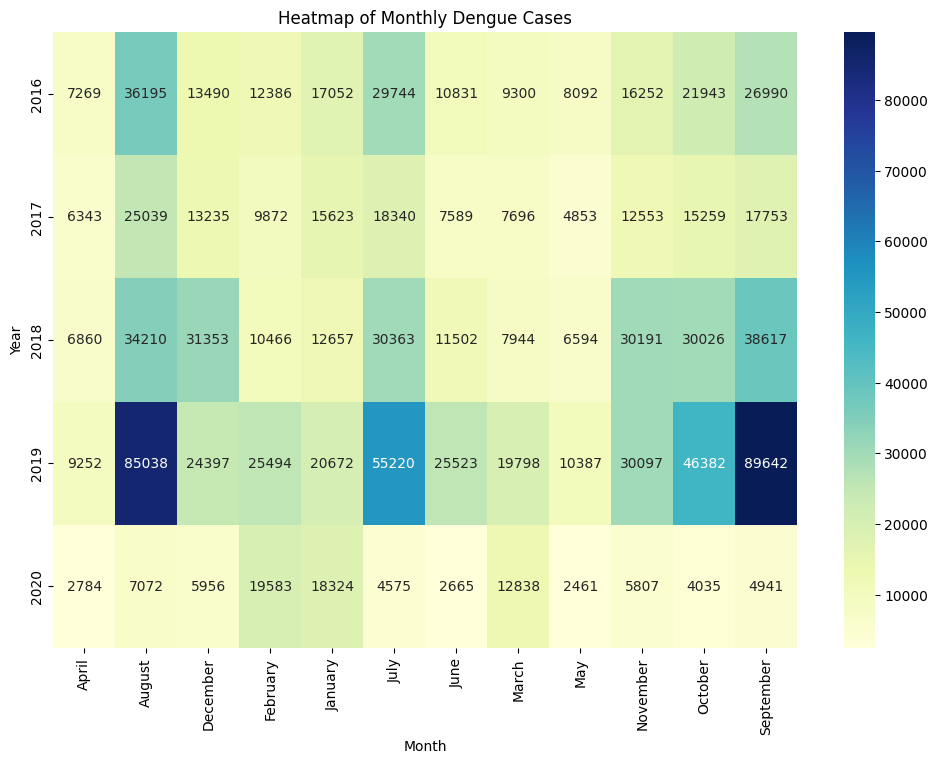

In [26]:
heatmap_data = dengue.pivot_table(index='Year', columns='Month', values='Dengue_Cases', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Monthly Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

<h3>The heatmap shows Dengue cases peak during the rainy season (July-October), with a major outbreak in 2019 (e.g., 89,642 cases in September). In contrast, 2020 saw significantly fewer cases, likely due to public health measures or environmental changes.</h3>

<h1>INSIGHT 17</h1>
<h2>Month with the highest cases for each region</h2>

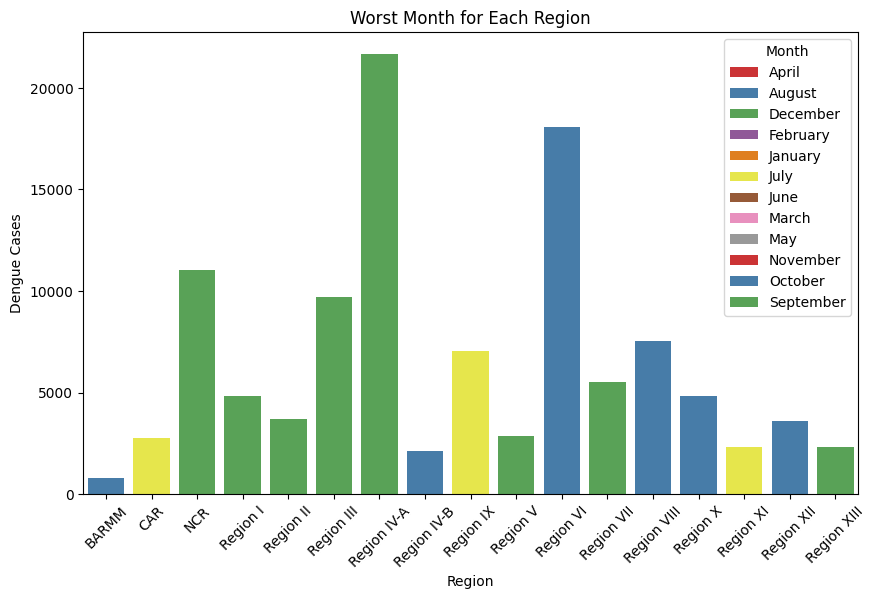

In [27]:
worst_month = dengue.loc[dengue.groupby('Region')['Dengue_Cases'].idxmax()][['Region', 'Month', 'Dengue_Cases']]
plt.figure(figsize=(10, 6))
sns.barplot(data=worst_month, x='Region', y='Dengue_Cases', hue='Month', palette='Set1')
plt.title('Worst Month for Each Region')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.show()

<h3>The month with the highest Dengue cases varies by region but is often clustered around the rainy season (e.g., August, September). For example, Region IV-A reported the highest cases in September (21,658), while Region VI peaked in August (18,090). This seasonal pattern highlights the influence of weather conditions on mosquito breeding and the need for region-specific prevention strategies during peak months.</h3>

<h1>INSIGHT 18</h1>
<h2>Month with the highest death cases for each regions</h2>

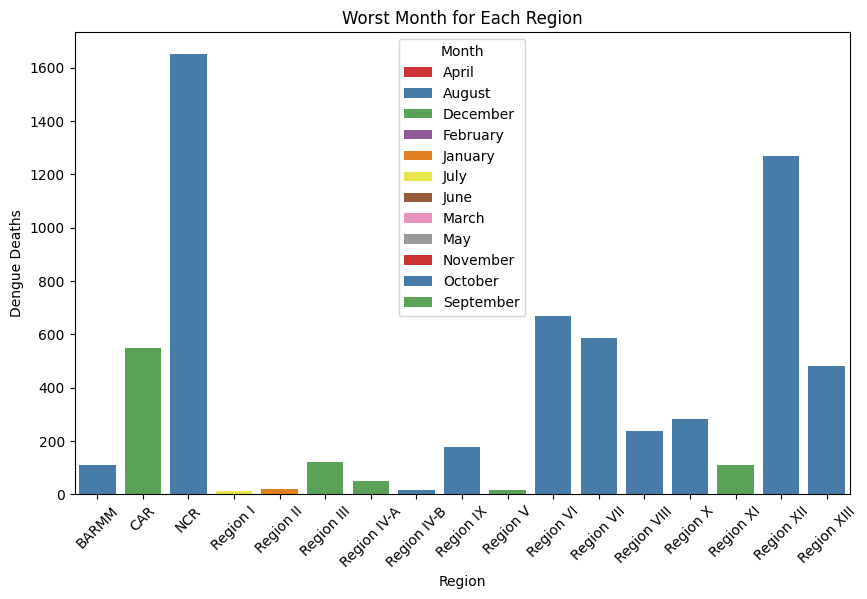

In [28]:
worst_month_death = dengue.loc[dengue.groupby('Region')['Dengue_Deaths'].idxmax()][['Region', 'Month', 'Dengue_Deaths']]
plt.figure(figsize=(10, 6))
sns.barplot(data=worst_month_death, x='Region', y='Dengue_Deaths', hue='Month', palette='Set1')
plt.title('Worst Month for Each Region')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')
plt.xticks(rotation=45)
plt.show()

<h3>The month with the highest Dengue-related deaths in most regions occurs during September or October , coinciding with the peak of the rainy season and higher case numbers. Notably, Region XII had the highest death toll in October (1,270), emphasizing the need for targeted healthcare interventions and mosquito control measures during these critical months to prevent fatalities.</h3>

<h1>INSIGHT 19</h1>
<h2>Year with the highest death cases in NCR</h2>

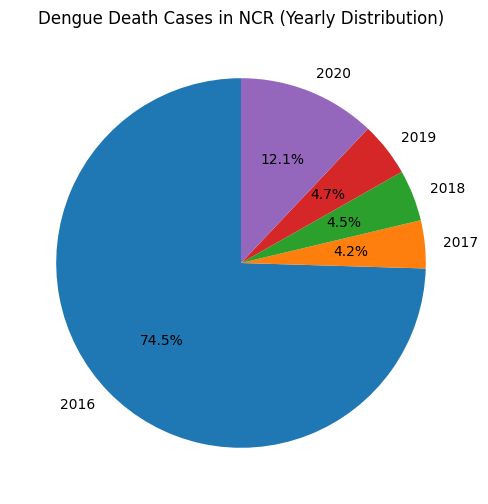

The year with the highest dengue death rates in NCR is: 2016
Number of deaths: 2987


In [29]:
ncr_data = dengue[dengue['Region'] == 'NCR']
yearly_deaths = ncr_data.groupby('Year')['Dengue_Deaths'].sum()
highest_year = yearly_deaths.idxmax()
highest_deaths = yearly_deaths.max()

plt.figure(figsize=(8, 6))
plt.pie(yearly_deaths.values, labels=yearly_deaths.index, autopct='%1.1f%%', startangle=90)
plt.title('Dengue Death Cases in NCR (Yearly Distribution)')
plt.show()
print(f"The year with the highest dengue death rates in NCR is: {highest_year}")
print(f"Number of deaths: {highest_deaths}")

<h3>The NCR recorded its highest Dengue death rate in 2016 , with 2,987 deaths , indicating a severe outbreak that year. This highlights the critical need for improved healthcare responses and preventive measures during high-risk periods to reduce mortality rates in densely populated urban areas like the NCR.</h3>

<h1>INSIGHT 20</h1>

<h2>Month with the highest death rate in NCR</h2>

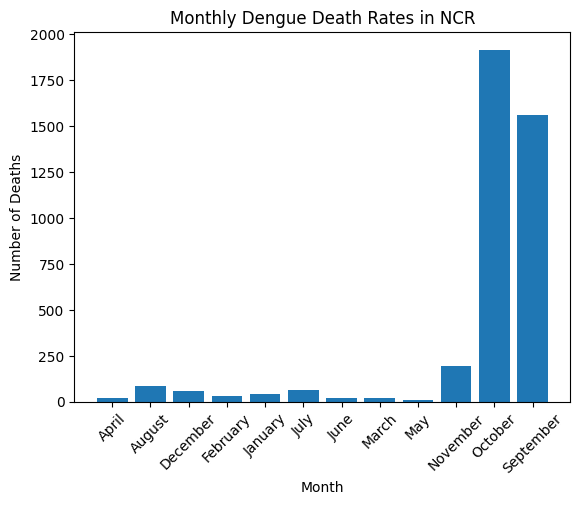

The month with the highest dengue death rate in NCR is: October
Number of deaths: 1917


In [30]:
ncr_data = dengue[dengue['Region'] == 'NCR']
monthly_deaths = ncr_data.groupby('Month')['Dengue_Deaths'].sum()
highest_month = monthly_deaths.idxmax()
highest_deaths = monthly_deaths.max()
plt.bar(monthly_deaths.index, monthly_deaths.values, )
plt.title('Monthly Dengue Death Rates in NCR')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()
print(f"The month with the highest dengue death rate in NCR is: {highest_month}")
print(f"Number of deaths: {highest_deaths}")
